In [1]:
import os

path, dirs, files = next(os.walk("data/processed_falling/"))
file_count = len(files)

window = 30
attr_num = 6
file_lines = []

for file_numb in range(0,file_count):
    print('----------------------')
    print(f'-------{file_numb}------------')
    print('----------------------')

    with open(f"data/processed_falling/falling_data{file_numb}.txt", "r") as read_data_file:#read file  
        list_data = []
        for data in read_data_file:
            data = str(data)
            data = data.split(',')
            data = data[1:]
            data[-1] = data[-1][:-1]
            list_data.append(data)
        print(len(list_data))
        file_lines.append(len(list_data))

----------------------
-------0------------
----------------------
86
----------------------
-------1------------
----------------------
89
----------------------
-------2------------
----------------------
70
----------------------
-------3------------
----------------------
81
----------------------
-------4------------
----------------------
82
----------------------
-------5------------
----------------------
75
----------------------
-------6------------
----------------------
88
----------------------
-------7------------
----------------------
90
----------------------
-------8------------
----------------------
76
----------------------
-------9------------
----------------------
84
----------------------
-------10------------
----------------------
82
----------------------
-------11------------
----------------------
63
----------------------
-------12------------
----------------------
87
----------------------
-------13------------
----------------------
88
----------------

----------------------
-------133------------
----------------------
75
----------------------
-------134------------
----------------------
85
----------------------
-------135------------
----------------------
96
----------------------
-------136------------
----------------------
93
----------------------
-------137------------
----------------------
89
----------------------
-------138------------
----------------------
88
----------------------
-------139------------
----------------------
82
----------------------
-------140------------
----------------------
119
----------------------
-------141------------
----------------------
91
----------------------
-------142------------
----------------------
87
----------------------
-------143------------
----------------------
84
----------------------
-------144------------
----------------------
79
----------------------
-------145------------
----------------------
87
----------------------
-------146------------
-----------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transforms3d.axangles import axangle2mat  # for rotation

dataset = pd.read_csv('all_fall_data.txt', header = None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,3688,17608,5768,3640,-3440,-9011,3124,16192,5140,1142,...,16036,2382,8463,2406,15128,-3564,12600,2519,3842,1681
1,3124,16192,5140,1142,-7367,-4567,5076,16648,4884,-23,...,12600,2519,3842,1681,6948,-584,14992,4338,14319,3168
2,5076,16648,4884,-23,-7450,-2434,4200,13540,3728,-2301,...,14992,4338,14319,3168,2564,-872,15744,4174,9922,1559
3,4200,13540,3728,-2301,1607,4308,4060,13952,2472,-3779,...,15744,4174,9922,1559,6636,-2096,15344,2720,-3710,1267
4,4060,13952,2472,-3779,9682,7942,2928,13636,3404,-4511,...,15344,2720,-3710,1267,4848,-592,15856,266,1447,901


In [3]:
X = dataset.values
print(X.shape)
X_new = X.reshape(X.shape[0], window, attr_num)
X_new.shape

(9631, 180)


(9631, 30, 6)

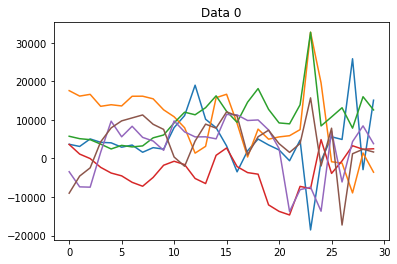

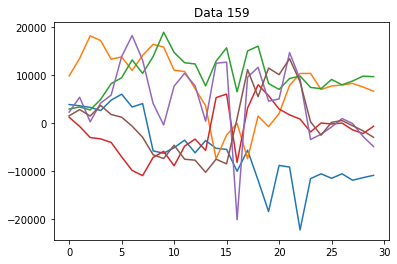

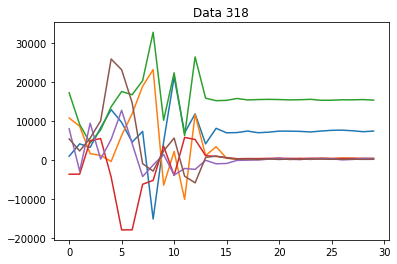

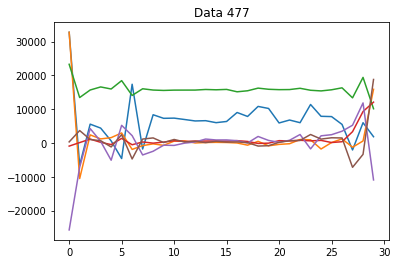

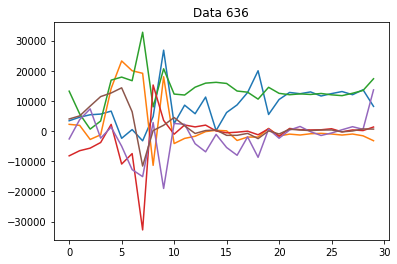

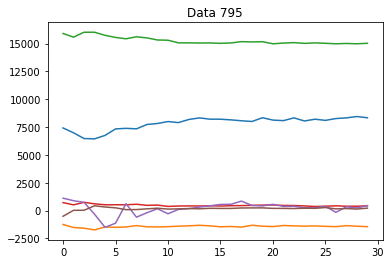

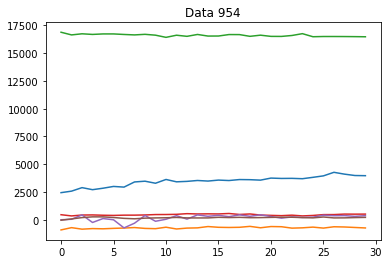

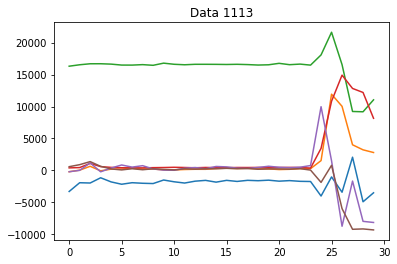

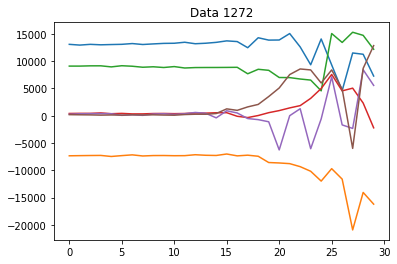

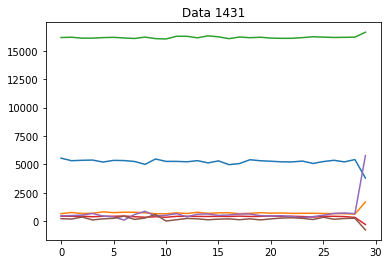

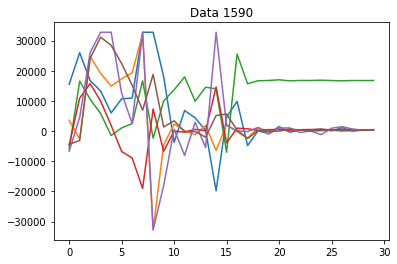

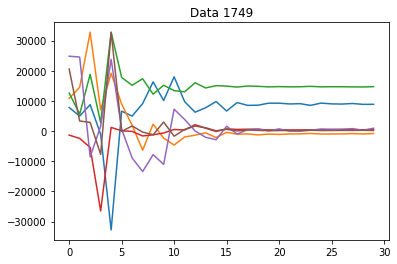

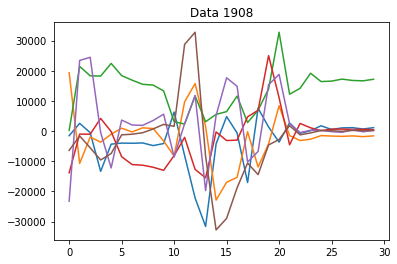

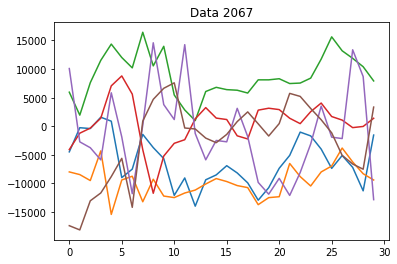

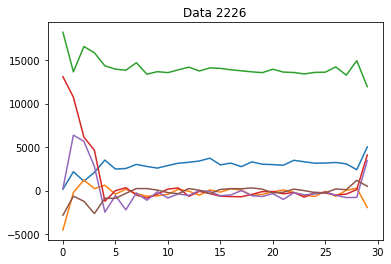

In [4]:
counter = 0
for i in range(15):
    plt.plot(X_new[counter + (i * 159)])
    plt.title(f"Data {counter + (i * 159)}")
    plt.show()

In [5]:
counter_inc = 0
X_new2 = []
for i in range(file_count):
    for j in range(25):
        X_new2.append(X_new[j + counter_inc])
        #print([j + counter_inc])
    
    counter_inc += (file_lines[i] - 30)

In [6]:
X_new3 = np.asarray(X_new2, order = (6,30))
X_new3.shape

(4450, 30, 6)

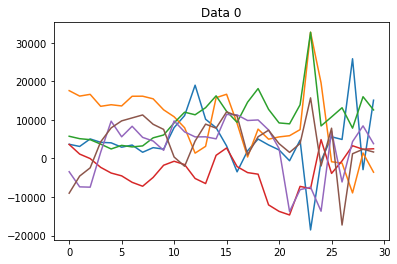

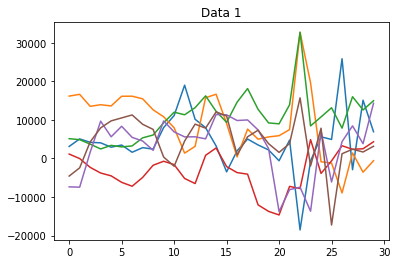

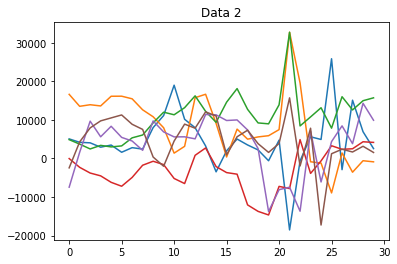

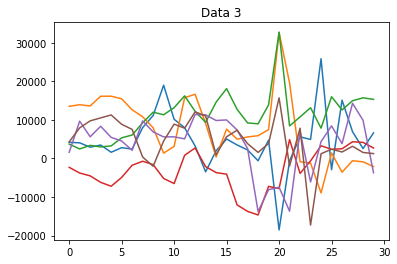

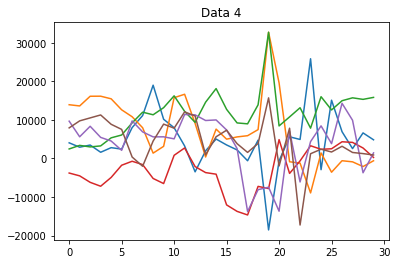

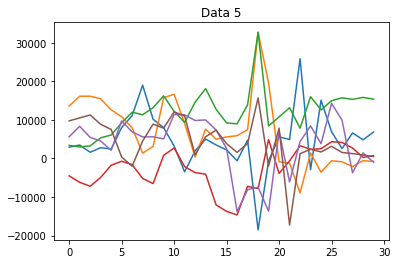

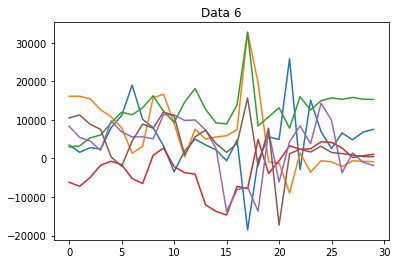

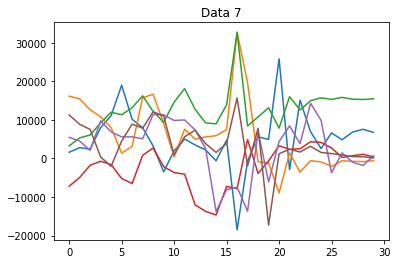

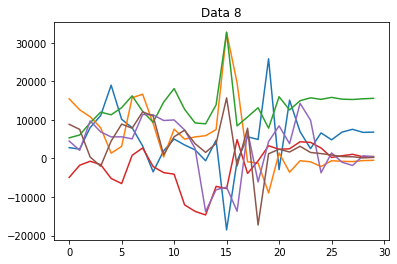

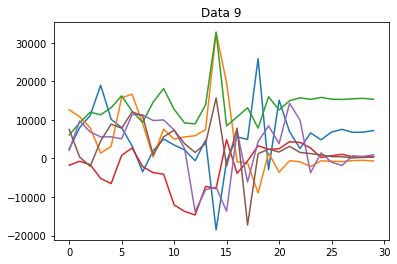

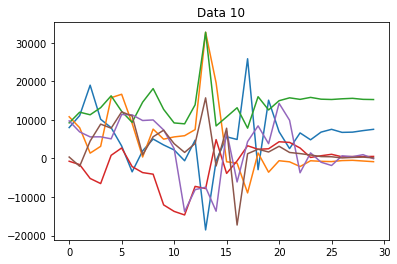

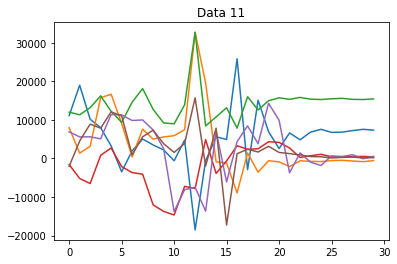

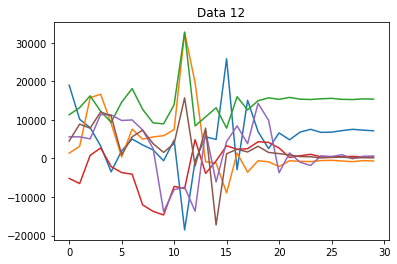

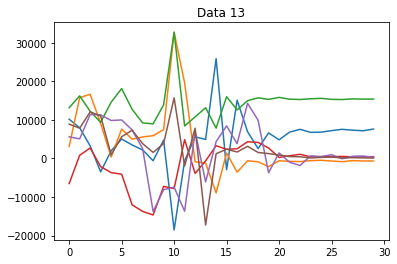

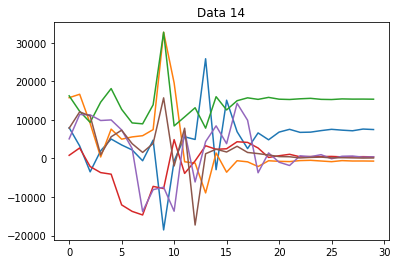

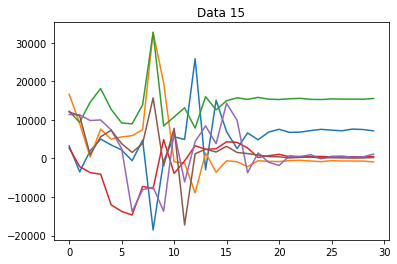

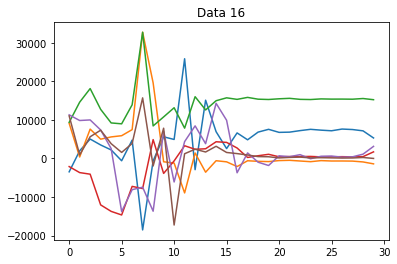

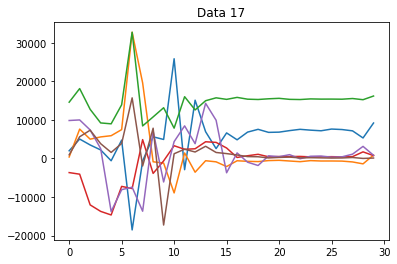

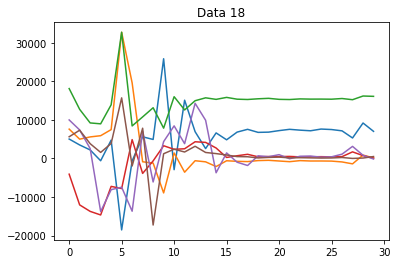

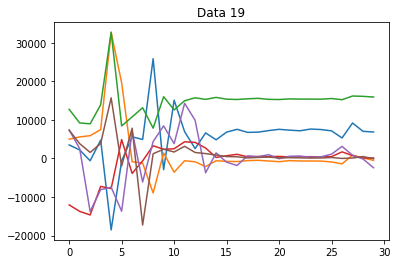

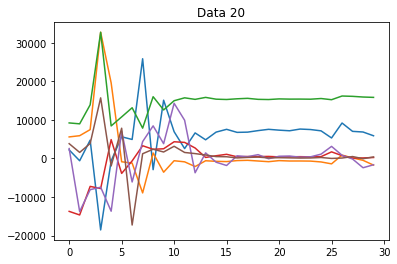

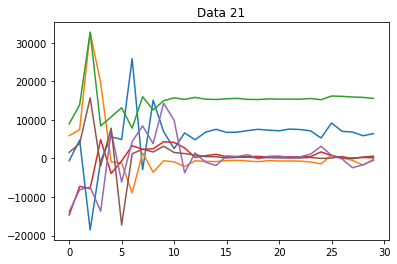

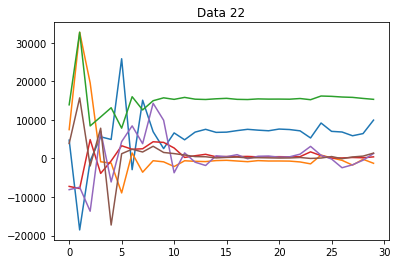

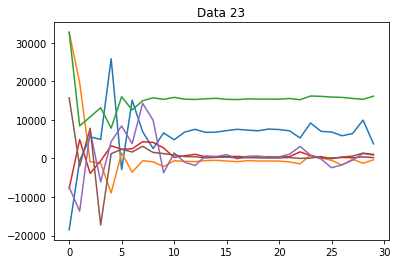

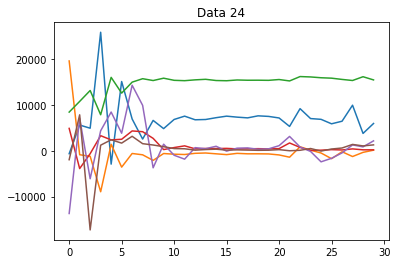

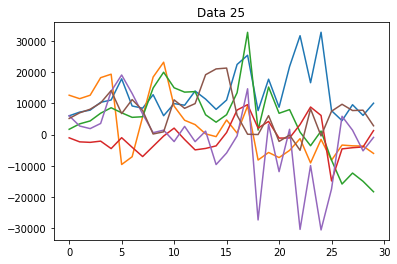

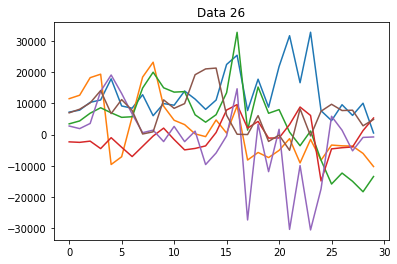

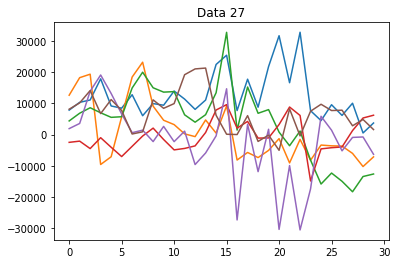

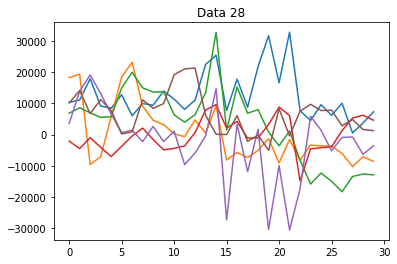

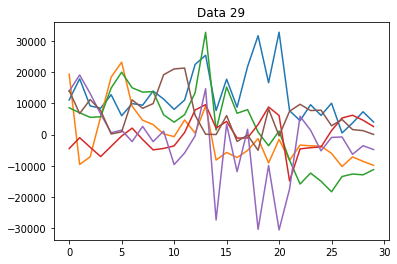

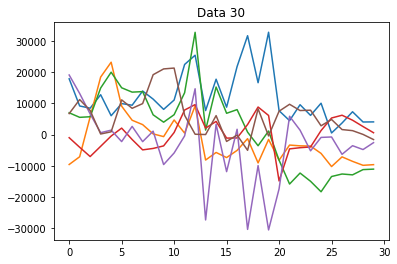

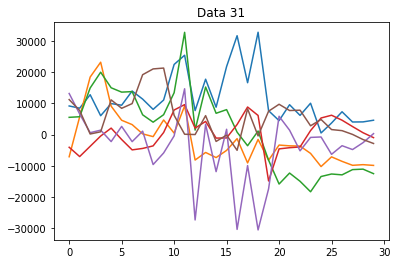

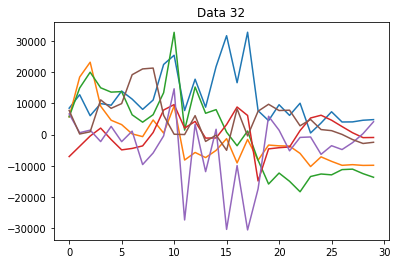

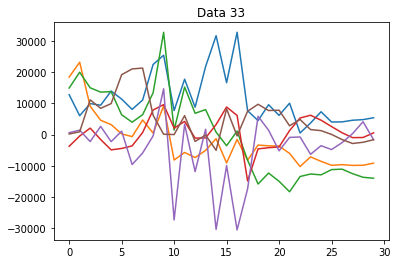

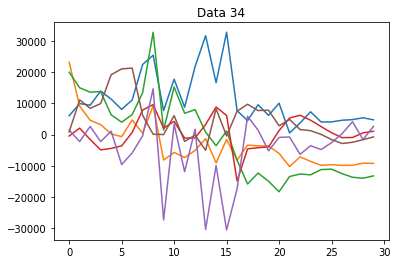

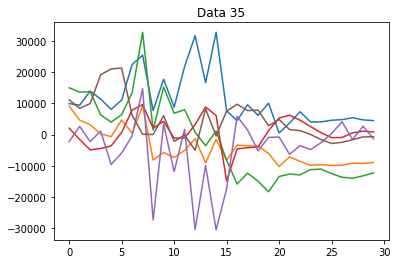

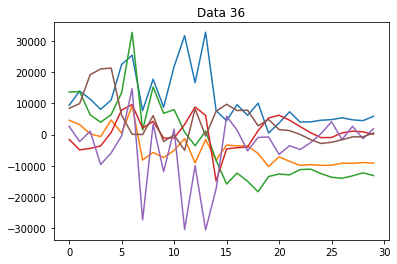

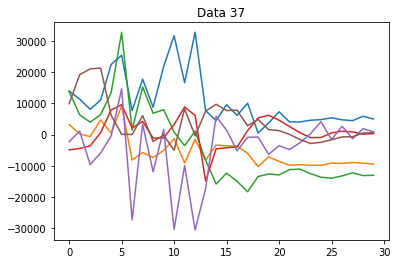

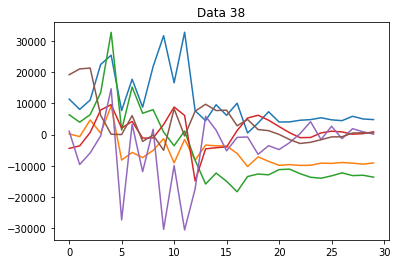

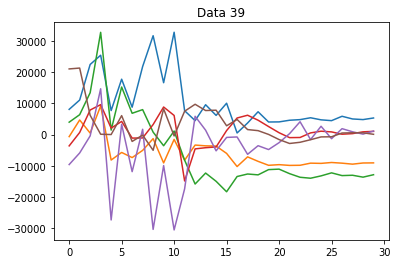

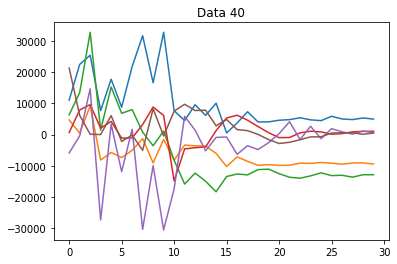

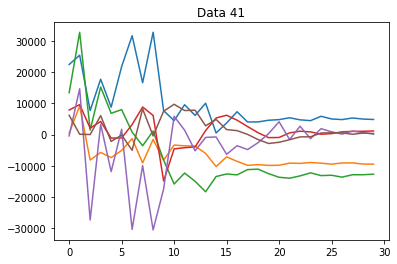

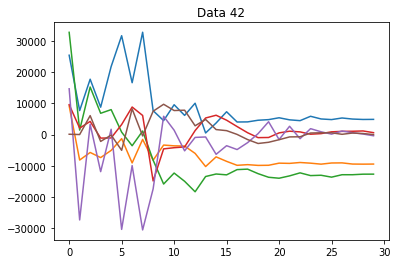

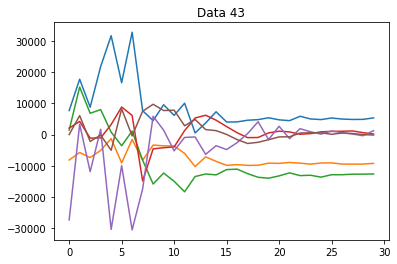

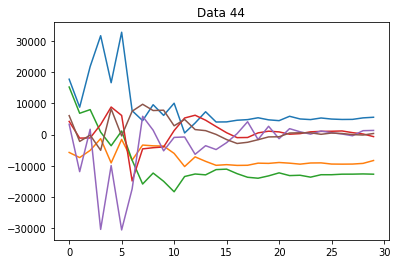

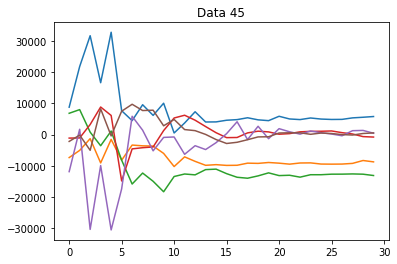

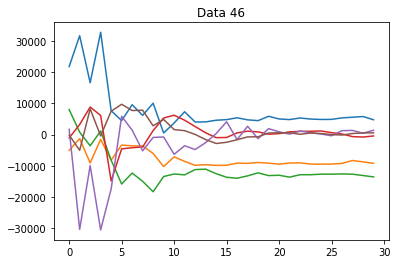

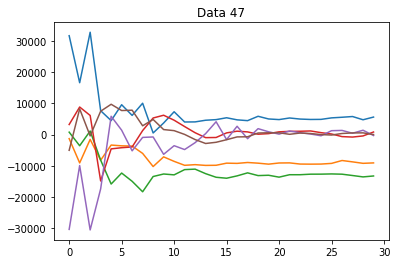

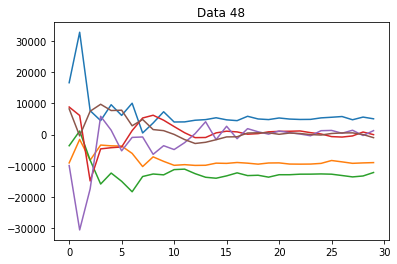

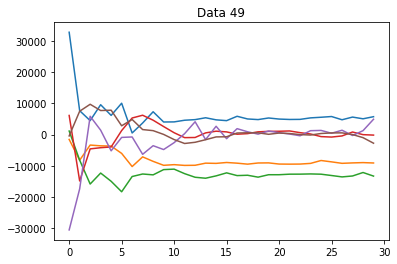

In [7]:
counter = 0
for i in range(50):
    plt.plot(X_new3[i])
    plt.title(f"Data {i}")
    plt.show()

In [7]:
X_temp = X_new3.copy()
#https://stackoverflow.com/questions/6431973/how-to-copy-data-from-a-numpy-array-to-another/33672015#33672015

In [11]:
def DA_Jitter(X):
    myNoise = np.random.randint(-1599,1599, size=X.shape)
    return X+myNoise

def DA_Rotation(X):
    axis = np.random.uniform(low=-1, high=1, size=3)
    angle = np.random.uniform(low=-np.pi, high=np.pi)
    for i in range(len(X)):
        X[i][:3] = np.matmul(X[i][:3], axangle2mat(axis,angle))
        X[i][3:] = np.matmul(X[i][3:], axangle2mat(axis,angle))
        return X

In [8]:
import time

In [12]:
X_final = X_new3.copy()
print(X_final.shape)
t = time.time()
for index in range(len(X_new3)):
    for augment_process in range(11):
        X_temp = X_new3[index].copy()
        norm_jitt = DA_Jitter(X_new3[index])
        jitt_rot = DA_Rotation(norm_jitt)
        norm_rot = DA_Rotation(X_temp)
        rot_jitt = DA_Jitter(norm_rot)
        X_final = np.append(X_final,[norm_jitt, norm_rot, jitt_rot, rot_jitt], axis = 0)
elapsed = time.time() - t
print(f"Elapsed time : {elapsed}")
print(X_final.shape)

(4450, 30, 6)
Elapsed time : 4075.9032611846924
(200250, 30, 6)


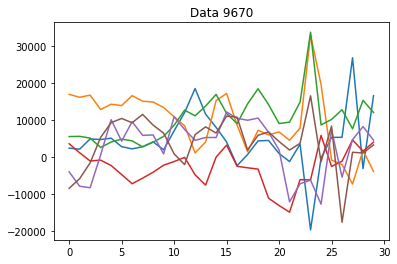

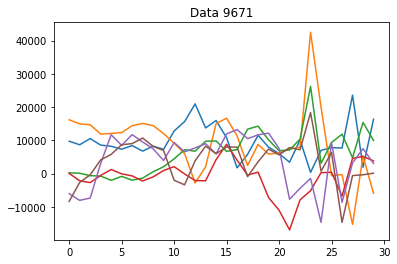

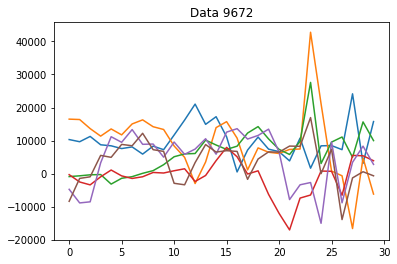

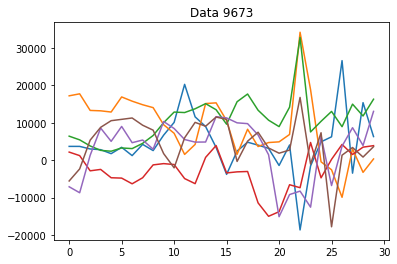

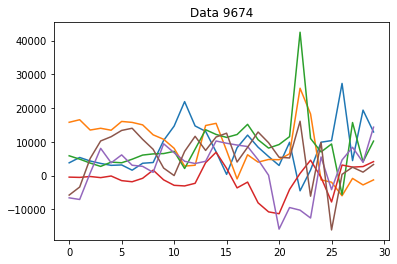

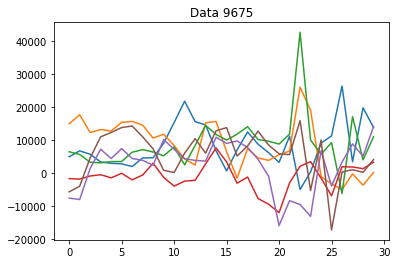

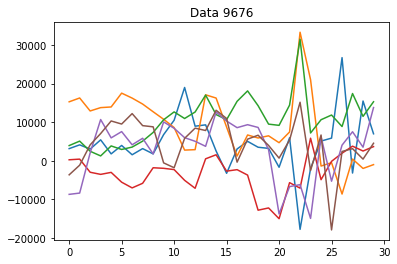

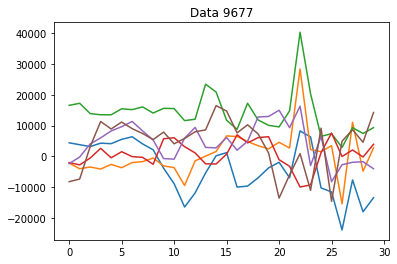

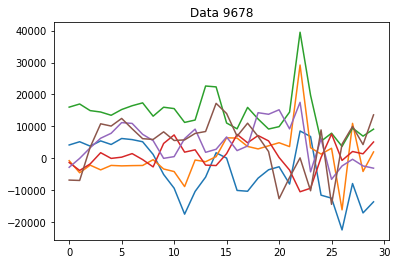

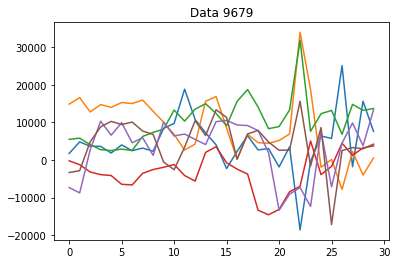

In [20]:
counter = 0
for i in range(9670,9680):
    plt.plot(X_final[i])
    plt.title(f"Data {i}")
    plt.show()

In [28]:
print(len(X_final))
print(len(X_final[0]))
print(len(X_final[0][0]))
print(X_final[0])
print(X_final[0][0])
print(X_final[0][0][0])

196531
30
6
[[  3688  17608   5768   3640  -3440  -9011]
 [  3124  16192   5140   1142  -7367  -4567]
 [  5076  16648   4884    -23  -7450  -2434]
 [  4200  13540   3728  -2301   1607   4308]
 [  4060  13952   2472  -3779   9682   7942]
 [  2928  13636   3404  -4511   5632   9761]
 [  3488  16152   3000  -6191   8359  10531]
 [  1612  16168   3264  -7206   5475  11299]
 [  2808  15488   5356  -4922   4531   8875]
 [  2432  12632   6092  -1756   2119   7545]
 [  8016  10828   9244   -720   9746    375]
 [ 11140   7976  12016  -1589   6899  -2017]
 [ 19024   1388  11344  -5189   5605   4527]
 [ 10176   3152  13188  -6511   5622   8917]
 [  7984  15780  16256    820   5096   7862]
 [  3252  16668  12232   2727  11415  12101]
 [ -3464   9112   9384  -2106  11323  11038]
 [  1992    388  14612  -3665   9857    949]
 [  5044   7620  18144  -4077  10005   5638]
 [  3508   5012  12752 -12050   7402   7338]
 [  2220   5596   9228 -13732   2569   3844]
 [  -592   5912   8992 -14663 -13775   1574

In [13]:
t = time.time()
with open(f"processed_augmented_falling_data2.txt", "a+") as append_file:
    for arr_index in range(len(X_final)):
        data_to_write = ''
        for row in range(len(X_final[arr_index])):
            for column in range(len(X_final[arr_index][row])):
                data_to_write += f'{X_final[arr_index][row][column]},'
        data_to_write += '3\n'
        append_file.write(data_to_write)

elapsed = time.time() - t
print(f"Elapsed time : {elapsed}")

Elapsed time : 62.11055564880371


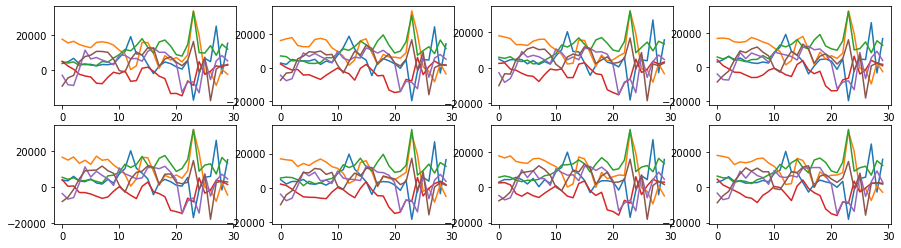

In [12]:
fig = plt.figure(figsize=(15,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(DA_Jitter(X_new3[0]))

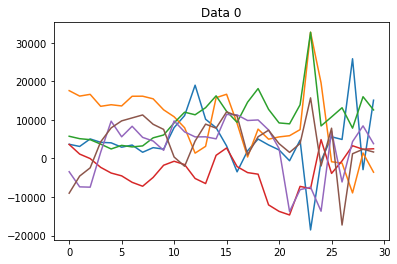

In [13]:
plt.plot(X_new3[0])
plt.title(f"Data 0")
plt.show()

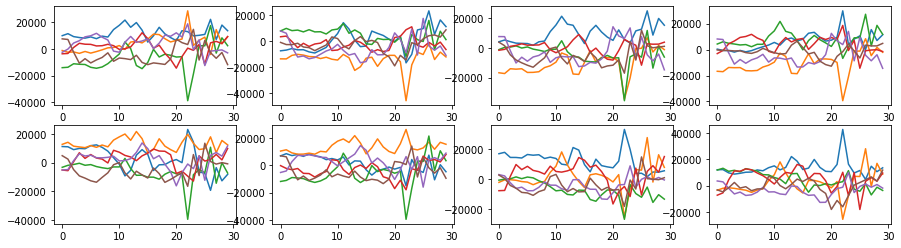

In [14]:
fig = plt.figure(figsize=(15,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(DA_Rotation(X_temp[1]))

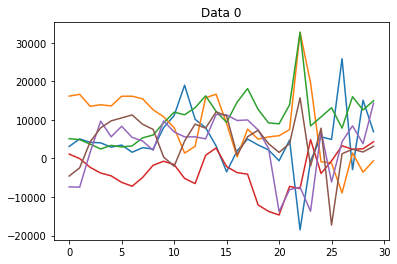

In [15]:
plt.plot(X_new3[1])
plt.title(f"Data 0")
plt.show()